***
<center><font color="dodgerblue"><font size="7"><b><i>Analyse de Données Développeur<br />(C5-160512-INFO)</i></b></font></font></center>

***

<center><font color="darkorange"><font size="8"><b><i>2) Tableaux et Espaces (TP) <br/><font size="6">&copy C. Frélicot, Automne 2023</font></i></b></font></font></center>

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

***
# 1)  Tableau de données (du TD)
***
## Lecture de fichier formatté à l'aide de *Pandas*.

In [3]:
df = pd.read_excel("TD1-data.xls",index_col=0)
df

,$X_1$,$X_2$
Id.,,
$x_1$,3,-1
$x_2$,-1,2
$x_3$,4,2


In [4]:
row_label = df.index.values 
col_label = df.columns.values
X = df[col_label].values

## Affectez les dimensions $n$ et $p$ du tableau $X$ à l'aide de la propriété/fonction numpy *shape*.

In [5]:
n, p = np.shape(X)

## Affichage du nuage de points-individus.

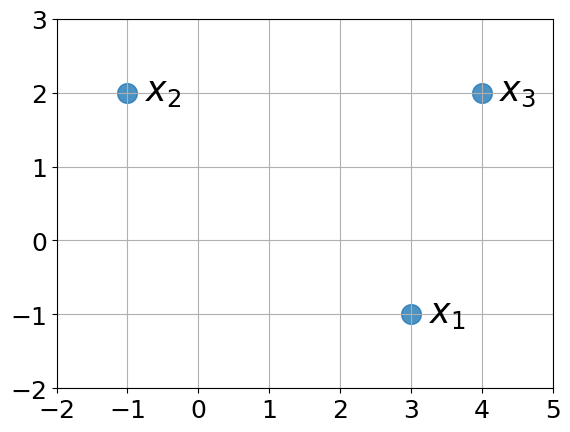

In [6]:
plt.scatter(X[:,0], X[:,1], s=200, alpha=0.8)
for k in range(n):
    plt.text(X[k,0]+0.25, X[k,1]-0.1,row_label[k],fontsize=25)
plt.xlim(-2, 5) ; plt.ylim(-2, 3)
plt.xticks(fontsize = 18) ; plt.yticks(fontsize = 18)
plt.grid()
#plt.savefig('TD1-data.png',bbox_inches='tight')

***
# 2) Espace des points-individus $(\mathbb{R}^p)$
***

## 2-1) Trouvez le moyen de centrer le tableau $X$. Vous noterez *Xp* (pour $X^\prime$) le tableau résultat.

In [11]:
Xp = X - np.mean(X, axis=0)
Xp

array([[ 1., -2.],
       [-3.,  1.],
       [ 2.,  1.]])

## 2-2) Calculez matriciellement les carrés des $I$-normes de tous les individus centrés : $||x_k^\prime||^2_I = <x_k^\prime,x_k^\prime>_I, \forall k=1,n$.

In [19]:
I = np.eye(Xp.shape[1])

normes = np.sum(Xp @ I * Xp, axis=1)
normes

array([ 5., 10.,  5.])

## Sans calcul, pouvez-vous affirmer qu'elles ont égales ou différentes de celles des individus non centrés (tableau $X$) ? 

In [ ]:
# Oui, elles sont égales. Car la norme d'un vecteur est indépendante de son origine.

## Rappelez à quoi sert $I$ (ou $I_p$).

In [ ]:
# I est la matrice identité de dimension p. Elle sert à pondérer les individus. 

## 2-3) Comment déterminer quels individus centrés sont $I-\bot$ ?

In [ ]:
# Les individus centrés sont I-orthogonaux si leur produit scalaire est nul. 

## 2-4) Comment déterminer les angles entre les individus centrés ?

In [ ]:
# Les angles entre les individus centrés sont déterminés par le produit scalaire. 

***
# 3) Espace des points-variables centrées $(\mathbb{R}^n)$
***

## 3-1) Créez la métrique $D$ (ou $D_n$) de l'espace des variables à partir de la matrice Identité. Rappel : $D$ pondère les individus.

In [20]:
D = np.eye(Xp.shape[0])

## 3-2) Calculez la $D$-norme (au carré) de la 2ème variable par produit scalaire : $||X^\prime_2||^2_D$

In [21]:
d_norme = np.sum(Xp[:,1] @ D * Xp[:,1])

## 3-3) Calculez la matrice $V$ de terme général $<X^\prime_i,X^\prime_j>_D (i,j=1,p)$.

In [22]:
V = Xp.T @ D @ Xp

## On peut vérifier ce résultat géométrique à l'aide d'une fonction *numpy* de statistique... laquelle ?

In [23]:
np.cov(Xp.T)

array([[ 7. , -1.5],
       [-1.5,  3. ]])

## 3-4) Pour construire le tableau $X^{\prime\prime}$ des données centrées-réduites, il suffit de réduire le tableau centré $X^\prime$. Touvez un moyen simple d'effectuer ce changement d'échelle. Vous noterez *Xs* ($s$ pour seconde) le tableau résultant. 

In [24]:
Xs = Xp / np.std(Xp, axis=0)

## Vérifiez que *Xs* est bien centré-réduit.

In [25]:
np.mean(Xs, axis=0), np.std(Xs, axis=0)

(array([0., 0.]), array([1., 1.]))

In [26]:
# Oui, les moyennes sont nulles et les écarts-types sont égaux à 1.

## 3-5) Reprenez la question 3.3) sur le tableau $X^{\prime\prime}$. Qu'obtient-on ?

In [27]:
V = Xs.T @ D @ Xs

## Comme précedemment, on peut vérifier ce résultat à l'aide d'une fonction... laquelle ? 

In [28]:
np.cov(Xs.T)

array([[ 1.5       , -0.49099025],
       [-0.49099025,  1.5       ]])

***
# 4) Ecriture de fonction python.
## En reprenant des bouts de codes des questions précédentes, écrivez une fonction permettant de :
<font size="5">
<ul>
<li>centrer et optionnellement réduire un tableau $data$</li>
<li>retourner les données transformées et la matrice de covariance de celles-ci
</li>
</ul>
</font>

## Deux versions sont possibles : géométrique et statistique. Vous testerez sur le tableau *X*.
***

In [29]:
def standardize(data,scale=False):
    
    data_p = data - np.mean(data, axis=0)
    if scale:
        data_s = data_p / np.std(data_p, axis=0)
        transformed_data = data_s
    else:
        transformed_data = data_p
    
    cov_data = np.cov(transformed_data.T)
    
    return transformed_data, cov_data



In [32]:
Xp, cov_Xp = standardize(X)

Xs, cov_Xs = standardize(X,scale=True)

cov_Xp, cov_Xs

(array([[ 7. , -1.5],
        [-1.5,  3. ]]),
 array([[ 1.5       , -0.49099025],
        [-0.49099025,  1.5       ]]))